In [1]:
 !pip install -U kaleido

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 19.2 MB/s eta 0:00:00


In [2]:
import plotly.graph_objs as go
from plotly.offline import plot
import plotly.io as pio  # For saving images
import numpy as np

from PIL import Image  # For image handling
from IPython.display import display, HTML  # For displaying images and HTML in notebooks

In [3]:
def make_wf(do_sort,do_text,font_size,font_size_XY,text_offset,title_val,z_data,x_data,text,filename):
    # ================================================================================================================================================
    # SET CONFIG PARAMETERS
    # ================================================================================================================================================
    box_line_width = 3

    blueb = 'rgba(55, 128, 191, 0.7)'
    redb  = 'rgba(219, 64, 82, 0.7)'
    greenb =  'rgba(50, 171, 96, 0.7)'

    bluel =  'rgba(55, 128, 191, 1)'
    redl  =  'rgba(219, 64, 82, 1)'
    greenl = 'rgba(50, 171, 96, 1)'

    bgcolor = 'rgba(245, 246, 249, 1)'
    bgcolor = 'rgba(255, 255, 255, 1)' 
    font_color = 'rgba(0,0,0, 1)'

    # ================================================================================================================================================
    # DECLARE VARS
    # ================================================================================================================================================

    BaseT = []
    UpT = []
    DownT = []
    EndT = []
    y_data = []


    # ================================================================================================================================================
    # BUILD INPUTS
    # ================================================================================================================================================

    Base = z_data[0]
    New_list = z_data[1:]
    records_count = len(New_list)
    list_total = 0

    if do_sort == 1:
        list1, list2 = (list(t) for t in zip(*sorted(zip(New_list, text))))


    for i in New_list:
        list_total = list_total +i
    End = list_total + Base


    running_total = 0
    for i in z_data:
        EndT.append(0)
    EndT.append(End)

    BaseT.append(0)
    BaseT.append(Base)
    running_total = Base

    switch = 0
    for i in New_list:
        if i > 0:
            running_total = i + running_total
        if i < 0:
            if switch == 0:
                counter = len(BaseT) - 1
                temp_val = BaseT[counter]
                BaseT.pop()
                BaseT.append(temp_val + i)
                running_total = (i) + running_total				
            if switch > 0:
                counter = len(BaseT) - 1
                temp_val = BaseT[counter]
                BaseT.pop()
                BaseT.append(temp_val + i)			
                running_total = (temp_val + i) 
            switch = switch + 1
        BaseT.append(running_total)		

    BaseT.pop()
    BaseT.append(0)		

    UpT.append(Base)
    DownT.append(0)

    for i in New_list:
        if i > 0:		
            UpT.append(i)		
            DownT.append(0)		
        if i < 0:
            UpT.append(0)		
            DownT.append((-1*i))		
    UpT.append(0)		  
    DownT.append(0)

    for i in range(0,len(BaseT)):
        if (BaseT[i] + UpT[i] + DownT[i] + EndT[i]) >= 0:
            pos = (BaseT[i] + UpT[i] + DownT[i] + EndT[i]) - (text_offset * abs(EndT[len(BaseT)-1]))
        if (BaseT[i] + UpT[i] + DownT[i] + EndT[i]) < 0:
            pos = (BaseT[i] + UpT[i] + DownT[i] + EndT[i]) - (text_offset * EndT[len(BaseT)-1])
        pos = (BaseT[i] + UpT[i] + DownT[i] + EndT[i]) + (text_offset * abs(EndT[len(BaseT)-1]))
        y_data.append(pos)


    if do_text == 1:	
        text = []
        text.append(Base)
        for i in range(0,len(New_list)):
            box_name = str(New_list[i])
            text.append(box_name)
        text.append(End)

    UpT[0] = 0
    EndT[0] = Base

    trace0 = go.Bar(x=x_data,y=BaseT, marker=dict(color='rgba(1,1,1, 0.0)',))
    trace1 = go.Bar(x=x_data,y=UpT,marker=dict(color=greenb,line=dict(color=greenl,width=box_line_width,)))
    trace2 = go.Bar(x=x_data, y=DownT, marker=dict(color=redb, line=dict(color='rgba(0, 0, 0, 0)', width=box_line_width)))
    trace3 = go.Bar(x=x_data,y=EndT,marker=dict(color=blueb,line=dict(color=bluel,width=box_line_width,)))

    data = [trace0, trace1, trace2, trace3]
    #layout = go.Layout(title=title_val,barmode='stack',paper_bgcolor=bgcolor,plot_bgcolor=bgcolor,showlegend=False,font=dict(family='Arial', size=font_size_XY,color=font_color))
    layout = go.Layout(title=dict(text=title_val, font=dict(color='red'), y=0.99), barmode='stack', paper_bgcolor=bgcolor, plot_bgcolor=bgcolor, showlegend=False, font=dict(family='Arial', size=font_size_XY, color=font_color))


    annotations = []

    for i in range(0, (len(z_data)+1)):
        annotations.append(dict(x=x_data[i], y=y_data[i], text=text[i],font=dict(family='Arial', size=font_size,color=font_color),showarrow=False,))
        layout['annotations'] = annotations
                        
    fig = go.Figure(data=data, layout=layout)

    # Save the chart as a PNG file
    plot(fig, filename=filename)  # Call plot directly since it's imported from plotly.offline

    
    # Save as PNG
    png_filename = filename.replace('.html', '.png')
    pio.write_image(fig, png_filename)  # Save as PNG

    print(f"Plot saved as {filename} and {png_filename}")

Plot saved as wf1.html and wf1.png


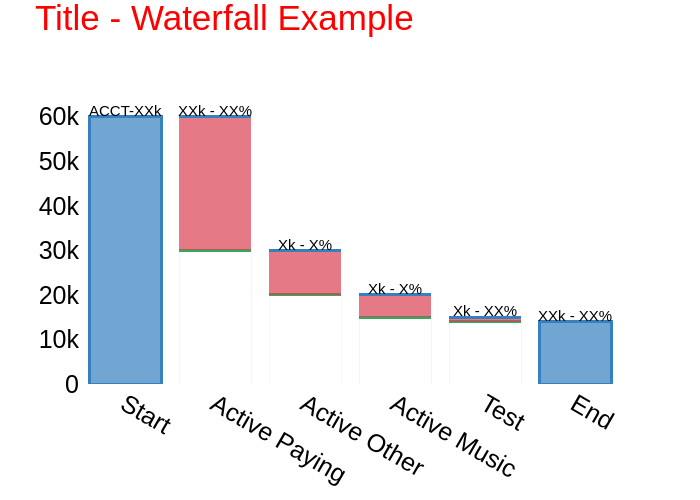

In [4]:
# SCENARIO A
do_sort = 1
do_text = 0
font_size = 15 # 55 Top of Bars
font_size_XY = 25 # 55 Title of Chart and X-Y Axis
text_offset = 0.1		
title_val = 'Title - Waterfall Example'
z_data = [60000,-30000,-10000,-5000,-1000]
x_data = ['Start', 'Active Paying','Active Other','Active Music','Test','End']
text = ['ACCT-XXk','XXk - XX%','Xk - X%','Xk - X%','Xk - XX%','XXk - XX%']
filename = 'wf1.html'

make_wf(do_sort,do_text,font_size,font_size_XY,text_offset,title_val,z_data,x_data,text,filename)

# Open and display the image
img = Image.open('/kaggle/working/wf1.png')
display(img)